# Change Finder

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import changefinder
%matplotlib inline

# read csv
df = pd.read_csv('listuu.csv')
#df = df.tail(110)
df.head()

,yymmdd,uu
0,2019-09-01,142093
1,2019-09-02,134372
2,2019-09-03,137703
3,2019-09-04,130252
4,2019-09-05,126291


In [3]:
df.shape

(122, 2)

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


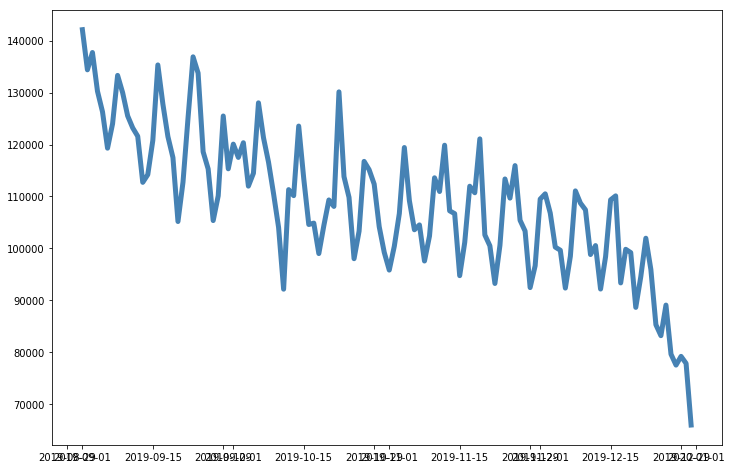

In [4]:
df['yymmdd'] = pd.to_datetime(df['yymmdd'])
df = df.set_index('yymmdd')

# トラフィック数を可視化
plt.rcParams['figure.figsize'] = 12, 8
plt.plot(df.index, df["uu"], linewidth=5, color="steelblue")

In [5]:
df = df[["uu"]]
df.head()

,uu
yymmdd,
2019-09-01,142093
2019-09-02,134372
2019-09-03,137703
2019-09-04,130252
2019-09-05,126291


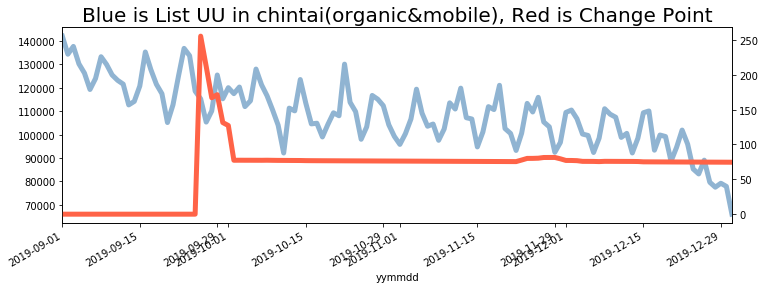

In [25]:
cf = changefinder.ChangeFinder(r = 0.01, order = 3, smooth = 14)

change = []
for i in df["uu"]:
    score = cf.update(i)
    change.append(score)

change_pd = pd.Series(change, index=df.index)

plt.rcParams['figure.figsize'] = 20, 8
uu = df["uu"].plot(figsize = (12,4), alpha = 0.6, color = "steelblue", linewidth=5, x_compat=True)
ax2 = uu.twinx()
ax2.plot(change_pd, alpha=1, color = "tomato", linewidth=5)
plt.title('Blue is List UU in chintai(organic&mobile), Red is Change Point', size=20)
plt.show()

In [41]:
change_pd.sort_values(ascending=False).head(5)

yymmdd
2019-09-26    255.394815
2019-09-27    211.880788
2019-09-29    171.432264
2019-09-28    167.058959
2019-09-30    131.413082
dtype: float64

In [42]:
list(change_pd.sort_values(ascending=False).head(5).index)

[Timestamp('2019-09-26 00:00:00'),
 Timestamp('2019-09-27 00:00:00'),
 Timestamp('2019-09-29 00:00:00'),
 Timestamp('2019-09-28 00:00:00'),
 Timestamp('2019-09-30 00:00:00')]